# Pharmaceutical Project
### Objective: 250 mice were treated with 4 different treatments, specifically Capomulin, Infubinol, Ketapril, and Placebo,over a course of 45 days.  Analyze the data to show how these four treatments compared.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from scipy.stats import sem

In [6]:
clinicaltrial = pd.read_csv('clinicaltrial_data.csv')
print(clinicaltrial.head())
mousedata = pd.read_csv('mouse_drug_data.csv')
print(mousedata.head())
all_data = pd.merge(clinicaltrial,mousedata,on='Mouse ID')
all_data.head()

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [7]:
# Checks to See if any of the values are NAN

all_data.isnull().values.any()

False

In [8]:
# Isolate the Specific Drugs That Are Going to be Analyzed: 
# Capomulin, Infubinol, Ketapril and Placebo
# Check to make sure all instances are accounted for

print(all_data['Drug'].value_counts())

capomulin = all_data[all_data['Drug']=='Capomulin']
infubinol = all_data[all_data['Drug']=='Infubinol']
ketapril = all_data[all_data['Drug']=='Ketapril']
placebo = all_data[all_data['Drug']=='Placebo']

print('Capomulin: ' + str(len(capomulin)))
print('Infubinol: ' + str(len(infubinol)))
print('Ketapril: '+str(len(ketapril)))
print('Placebo: '+str(len(placebo)))

capomulin.head()

Capomulin    230
Ramicane     228
Stelasyn     194
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug, dtype: int64
Capomulin: 230
Infubinol: 178
Ketapril: 188
Placebo: 181


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


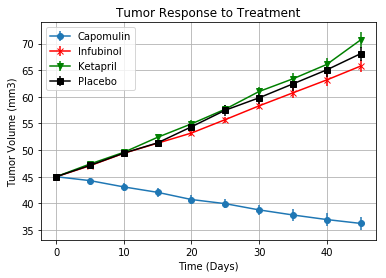

In [59]:
# Scatter Plot - Tumor Volume (Mean) Changes Over Time With Error Bars to show 
# Mice Variability

import numpy as np

c_mean = capomulin.groupby(['Timepoint'])['Tumor Volume (mm3)'].mean()
i_mean = infubinol.groupby(['Timepoint'])['Tumor Volume (mm3)'].mean()
k_mean = ketapril.groupby(['Timepoint'])['Tumor Volume (mm3)'].mean()
p_mean = placebo.groupby(['Timepoint'])['Tumor Volume (mm3)'].mean()

c_stan = capomulin.groupby(['Timepoint'])['Tumor Volume (mm3)'].sem()
i_stan = infubinol.groupby(['Timepoint'])['Tumor Volume (mm3)'].sem()
k_stan = ketapril.groupby(['Timepoint'])['Tumor Volume (mm3)'].sem()
p_stan = placebo.groupby(['Timepoint'])['Tumor Volume (mm3)'].sem()

time = np.arange(0,50,5)

plt.errorbar(time,c_mean,yerr=c_stan,label='Capomulin',marker='o')
plt.errorbar(time,i_mean,yerr=i_stan,color='r',label='Infubinol',marker='x')
plt.errorbar(time,k_mean,yerr=k_stan,color='g',label='Ketapril',marker='v')
plt.errorbar(time,p_mean,yerr=p_stan,color='black',label='Placebo',marker='s')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.legend()
plt.grid()
plt.show()

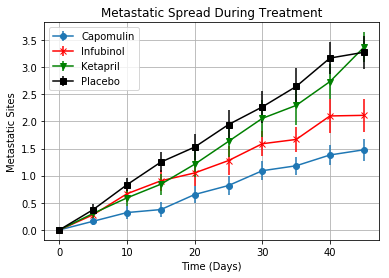

In [58]:
# Scatter Plot Showing how the # of Metastatic (Cancer Spreading) Sites 
# Changes Over Time

def metastatic(medicine):
    mean = medicine.groupby(['Timepoint'])['Metastatic Sites'].mean()
    stan = medicine.groupby(['Timepoint'])['Metastatic Sites'].sem()
    return mean,stan

c_mean, c_stan = metastatic(capomulin)
i_mean, i_stan = metastatic(infubinol)
k_mean, k_stan = metastatic(ketapril)
p_mean, p_stan = metastatic(placebo)

plt.errorbar(time,c_mean,yerr=c_stan,label='Capomulin',marker='o')
plt.errorbar(time,i_mean,yerr=i_stan,color='r',label='Infubinol',marker='x')
plt.errorbar(time,k_mean,yerr=k_stan,color='g',label='Ketapril',marker='v')
plt.errorbar(time,p_mean,yerr=p_stan,color='black',label='Placebo',marker='s')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Spread During Treatment')
plt.legend()
plt.grid()
plt.show()

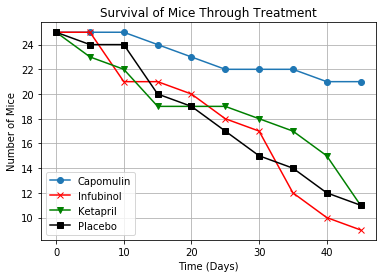

In [62]:
# Scatter Plot Showcasing the Amount of Mice that Survived a Specific Treatment

def mice_num(medicine):
    number = medicine.groupby(['Timepoint'])['Mouse ID'].count()
    return number

c_num = mice_num(capomulin)
i_num = mice_num(infubinol)
k_num = mice_num(ketapril)
p_num = mice_num(placebo)

plt.plot(time,c_num,label='Capomulin',marker='o')
plt.plot(time,i_num,color='r',label='Infubinol',marker='x')
plt.plot(time,k_num,color='g',label='Ketapril',marker='v')
plt.plot(time,p_num,color='black',label='Placebo',marker='s')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Mice')
plt.title('Survival of Mice Through Treatment')
plt.legend()
plt.grid()
plt.show()